In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**Q8 - A**

In [2]:
def get_skeleton(image):
    res = image.copy()
    params = []
    k = 0
    _, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
    res = np.zeros(image.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    while cv2.countNonZero(image)!=0:
        erosion = cv2.erode(image, element)
        open = cv2.dilate(erosion, element)
        SK = cv2.subtract(image, open)
        res = cv2.bitwise_or(res, SK)
        image = erosion
        params.append((k, SK))
        k += 1
    return res,params

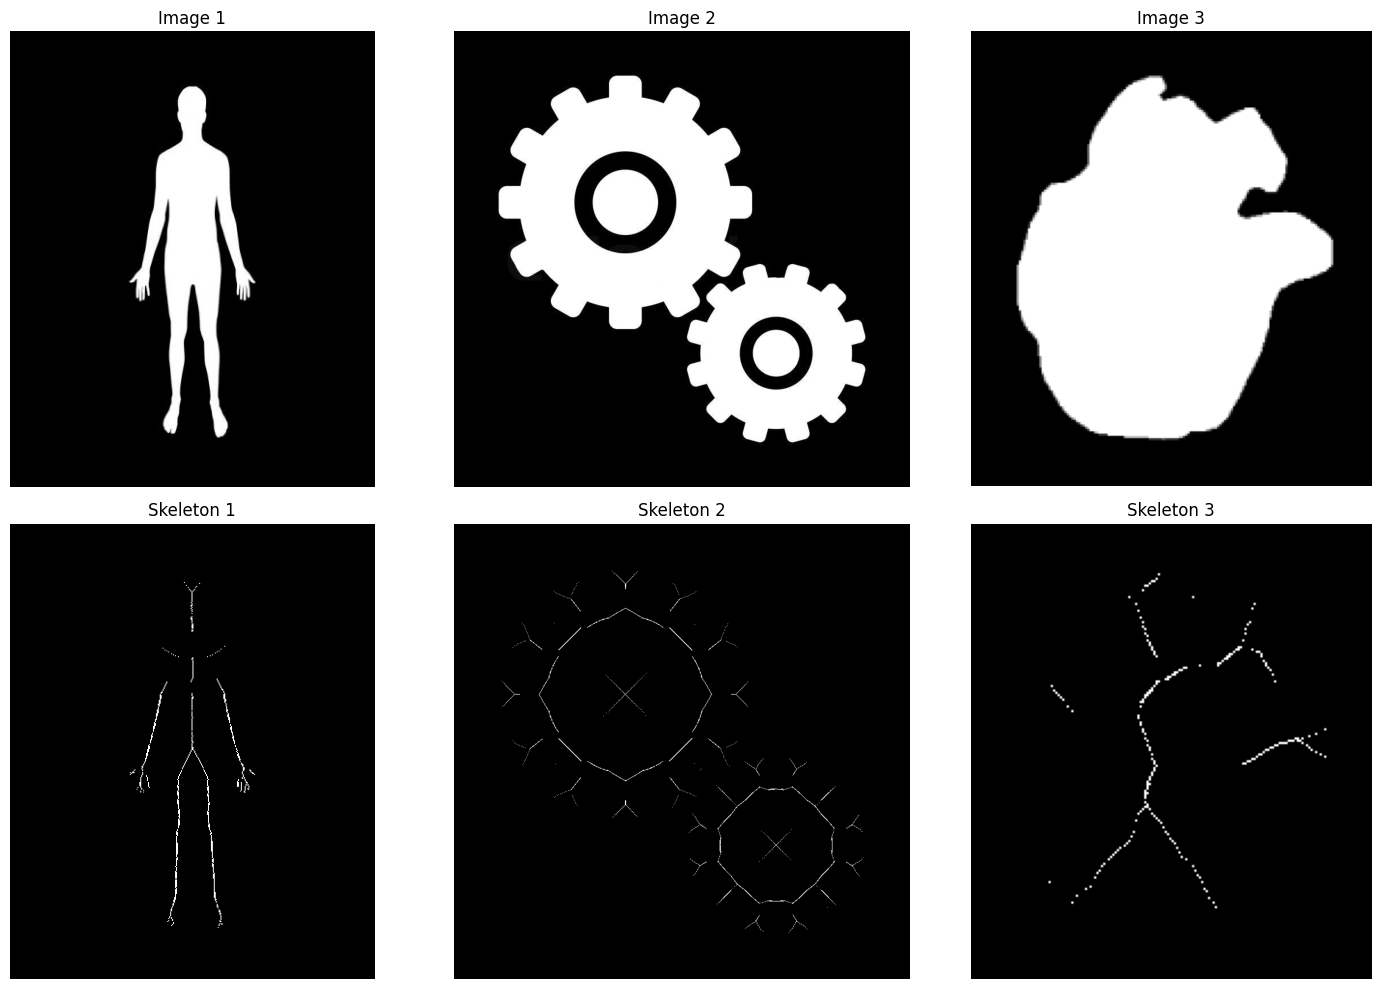

In [3]:
images = []
skels = []
image1 = cv2.imread('images/q8_5.jpg', cv2.IMREAD_GRAYSCALE)
images.append(image1)
skel1 ,params1= get_skeleton(image1)
skels.append(skel1)

image2 = cv2.imread('images/q8_6.png', cv2.IMREAD_GRAYSCALE)
images.append(image2)
skel2 ,params2= get_skeleton(image2)
skels.append(skel2)

image3 = cv2.imread('images/q8_7.png', cv2.IMREAD_GRAYSCALE)
images.append(image3)
skel3 ,params3= get_skeleton(image3)
skels.append(skel3)


for idx, skel in enumerate(skels):
    name = idx + 5
    cv2.imwrite(f'images/skels{idx + 1}.png', skel)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for idx, ax in enumerate(axs[0]):
    if idx < len(images):
        ax.imshow(images[idx], cmap='gray')
        ax.set_title(f'Image {idx + 1}')
        ax.axis('off')
for idx, ax in enumerate(axs[1]):
    if idx < len(skels):
        ax.imshow(skels[idx], cmap='gray')
        ax.set_title(f'Skeleton {idx + 1}')
        ax.axis('off')

plt.tight_layout()
plt.show()

**Q8 - B**

In [4]:
def recons_skeleton(image, params):
    res = image.copy()
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    for k, param in params:
        dilate = cv2.dilate(param ,element, iterations=k)
        res = cv2.bitwise_or(res, dilate)
        
    res = cv2.bitwise_not(res)    
    return res

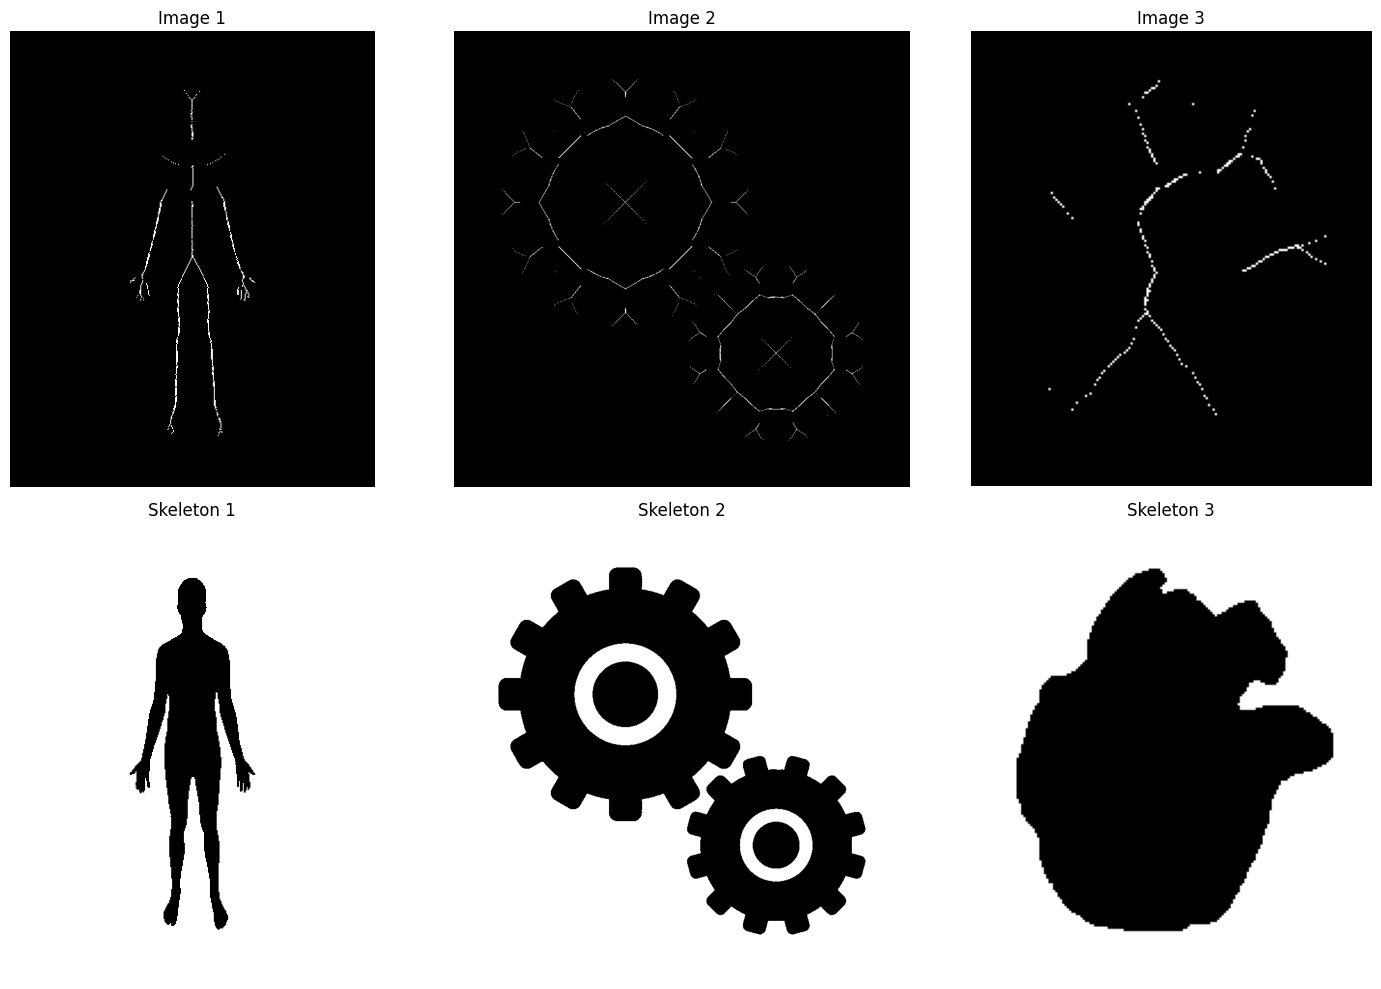

In [5]:
skel1 = cv2.imread('images/skels1.png', cv2.IMREAD_GRAYSCALE)
skel2 = cv2.imread('images/skels2.png', cv2.IMREAD_GRAYSCALE)
skel3 = cv2.imread('images/skels3.png', cv2.IMREAD_GRAYSCALE)

re_skels = []
re_skels.append(skel1)
re_skels.append(skel2)
re_skels.append(skel3)

re_images = []
re_images.append(recons_skeleton(skel1,params1))
re_images.append(recons_skeleton(skel2,params2))
re_images.append(recons_skeleton(skel3,params3))


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for idx, ax in enumerate(axs[0]):
    if idx < len(re_skels):
        ax.imshow(re_skels[idx], cmap='gray')
        ax.set_title(f'Image {idx + 1}')
        ax.axis('off')
for idx, ax in enumerate(axs[1]):
    if idx < len(re_images):
        ax.imshow(re_images[idx], cmap='gray')
        ax.set_title(f'Skeleton {idx + 1}')
        ax.axis('off')

plt.tight_layout()
plt.show()
